In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Read the data from a CSV file
pokemon = pd.read_csv('Files/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


This Data is currently in a human-readable form, as there is a row for each observation, and a separate column for each variable (category); but is not good for analysis as; if we wanted to create using ‘groupby‘ operations or begin to normalize this dataframe to we would need to do some reshaping.

# Introduction to pandas.melt() Function (Data Wrangling Step)

Pandas melt() function is used to change the DataFrame format from **wide** to **long**.

It’s used to create a specific format of the DataFrame object where:
* One or more columns work as identifiers.
* All the remaining columns are treated as values and _unpivoted_ to the row axis and **only two columns – variable and value**.

In [5]:
data = {
    "location": ['CityA', 'CityB'],
    "Temperature": ["Predict", "Actual"],
    "Jan-2010": [30, 32],
    "Feb-2010": [45, 43],
    "Mar-2010": [24, 22]
}
data

{'location': ['CityA', 'CityB'],
 'Temperature': ['Predict', 'Actual'],
 'Jan-2010': [30, 32],
 'Feb-2010': [45, 43],
 'Mar-2010': [24, 22]}

In [7]:
df = pd.DataFrame(data)
df

,location,Temperature,Jan-2010,Feb-2010,Mar-2010
0,CityA,Predict,30,45,24
1,CityB,Actual,32,43,22


Now before we begin to use `melt` function we have to understand its parameters first.

**DataFrame.melt(id_vars, value_vars, var_name, value_name)**
* **id_vars:** These are the columns that will be used as identifiers (i.e Accessors) against the other columns which will be unpivoted.
* **value_vars:** columns choosed to be unpivoted into two columns; a variable column which contains all columns names ***-that are not identifiers-*** and a value column in which contains the value for that column name in the variable column.
* **var_name:** It is a name of the new column "variables column".
* **value_name:** It is a name to use for the "value column" of the columns that are unpivoted.

In [10]:
df2 = pd.melt(df, id_vars=["location"])
df2

,location,variable,value
0,CityA,Temperature,Predict
1,CityB,Temperature,Actual
2,CityA,Jan-2010,30
3,CityB,Jan-2010,32
4,CityA,Feb-2010,45
5,CityB,Feb-2010,43
6,CityA,Mar-2010,24
7,CityB,Mar-2010,22


**Note:** if no value_vars specified, the default is the rest of the dataframe columns other than id_vars.

In [12]:
df2 = pd.melt(df, id_vars=["location"], value_vars=["Temperature"])
df2

,location,variable,value
0,CityA,Temperature,Predict
1,CityB,Temperature,Actual


**Note:** if value_vars is specified, the the rest of the dataframe columns will be discarded.

In [14]:
df2 = pd.melt(df, id_vars=["location", "Temperature"], var_name="Date", value_name="Value")
df2

,location,Temperature,Date,Value
0,CityA,Predict,Jan-2010,30
1,CityB,Actual,Jan-2010,32
2,CityA,Predict,Feb-2010,45
3,CityB,Actual,Feb-2010,43
4,CityA,Predict,Mar-2010,24
5,CityB,Actual,Mar-2010,22


# Absolute Vs Relative Frequency
---

The function below will do the following in the pokemon dataframe out of place:
1. Select the **'id', and 'species'** columns from pokemon. **(id_vars)**
2. Select the **'type_1', 'type_2'** columns from pokemon. **(value_vars)**
3. Add a new column **'type_level'** that can have a value either 'type_1' or 'type_2'. **(Variable column)**
4. Add another column **'type'** that will contain the actual value contained in the 'type_1', 'type_2' columns. **(Value column)**

In [15]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [17]:
pkmn_types.shape

(1614, 4)

For example, the first row in the pokemon dataframe having id=1 and species=bulbasaur will now occur twice in the resulting dataframe after the melt() operation.

In [18]:
pkmn_types.loc[pkmn_types['id'] == 1]

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


The first occurrence will have type=grass, whereas, the second occurrence will have type=poison.

## Absolute Frequency
---
Absolute frequency is a statistical term describing the number of times a particular piece of data or a particular value appears during a trial or set of trials.

**Essentially, absolute frequency is a simple count of the number of times a value is observed.**

Absolute frequency is usually expressed as a ___whole number___ and is considered a very basic level of statistical analysis.

---
**Quick Quizz:** Find the frequency of unique values in the type column.

In [19]:
pkmn_types['type'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying', nan], dtype=object)

<AxesSubplot:xlabel='count', ylabel='type'>

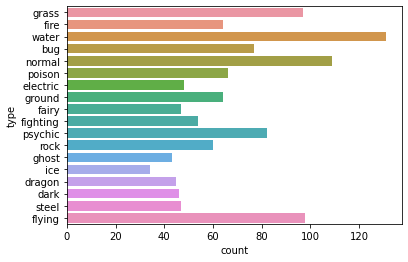

In [21]:
sb.countplot(data=pkmn_types, y="type")

<AxesSubplot:xlabel='count', ylabel='type'>

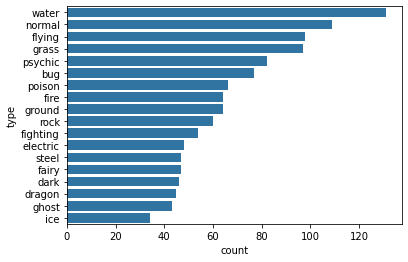

In [23]:
selected_color = sb.color_palette()[0]
selected_order = pkmn_types['type'].value_counts().index
sb.countplot(data=pkmn_types, y="type", order = selected_order, color= selected_color)

## Relative Frequency
---
Absolute frequency can be the starting point for a more nuanced statistical analysis.\
Relative frequency, for example, is derived from absolute frequency.

When the absolute frequency of values is tracked over the entire trial, the absolute frequency for a particular value can then be divided by the total number of values for that variable throughout the trial to get the relative frequency.

$$
\frac
{absolute\hspace{3mm}frequency\hspace{3mm}for\hspace{3mm}a\hspace{3mm}particular\hspace{3mm}value}
{total\hspace{3mm}number\hspace{3mm}of\hspace{3mm}values\hspace{3mm}for\hspace{3mm}that\hspace{3mm}variable}
$$


In [41]:
# Returns all not-null values propotions in `type` column
total_pokemons = pkmn_types['type'].value_counts().sum()
props_pokemon = pkmn_types['type'].value_counts() / total_pokemons * 100
props_pokemon

water       10.808581
normal       8.993399
flying       8.085809
grass        8.003300
psychic      6.765677
bug          6.353135
poison       5.445545
fire         5.280528
ground       5.280528
rock         4.950495
fighting     4.455446
electric     3.960396
steel        3.877888
fairy        3.877888
dark         3.795380
dragon       3.712871
ghost        3.547855
ice          2.805281
Name: type, dtype: float64

#### Customize the graph (1)
1. Capture the maximum propotion between all propotions.
2. Use the captured value to create an evenly space array. **(difference of 0.02)**
3. Use the array to create string ticks to be used as labels.
4. use both arrays to customize the graph

In [31]:
max_prop = props_pokemon[0]
max_prop

10.80858085808581

In [36]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop/100, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [38]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

The `xticks` and `yticks` functions aren't only about rotating the tick labels.

You can also get and set their **locations** and **labels** as well.
* **Argument 1 - tick-locations:** in this case, the tick proportions multiplied back to be on the scale of counts.
* **Argument 2 - tick-names:** in this case, the tick proportions formatted as strings to two decimal places.

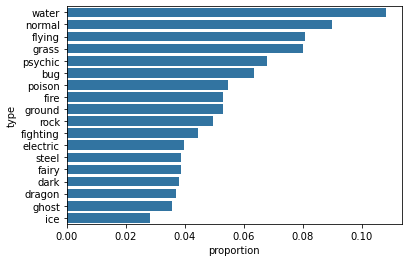

In [42]:
sb.countplot(data=pkmn_types, y='type', color=selected_color, order=selected_order);

# Change the tick locations and labels
plt.xticks(tick_props * total_pokemons, tick_names)
plt.xlabel('proportion');

#### Customize the graph - print percentage beside the bar (Horizontal Graph)

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead.

This requires writing a loop over the tick locations and labels and adding one text element for each bar.
1. Capture the number of types you have. **(Loop)**
2. Capture the frequency for each type. **(Location)**
3. Calculate the proption for each type. **(Proptions)**

In [53]:
# we could use `pkmn_types['type'].unique()` to count the unique pokemon types but this will count NaN as a type.
# we either subtract 1 from the result or use `value_count().shape[0]` as this function will not count NaN as a type.
pokemon_types_count = pkmn_types['type'].value_counts().shape[0]
pokemon_types_count

18

In [60]:
pokemon_types_frequency = pkmn_types['type'].value_counts()
pokemon_types_frequency # This value will be used in `text` function to define where the test should be printed.

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [55]:
#Already Done In The Previous Step
#props_pokemon = pkmn_types['type'].value_counts() / total_pokemons * 100
props_pokemon

water       10.808581
normal       8.993399
flying       8.085809
grass        8.003300
psychic      6.765677
bug          6.353135
poison       5.445545
fire         5.280528
ground       5.280528
rock         4.950495
fighting     4.455446
electric     3.960396
steel        3.877888
fairy        3.877888
dark         3.795380
dragon       3.712871
ghost        3.547855
ice          2.805281
Name: type, dtype: float64

Use `plt.text(x, y, s, arg**)` to print the values.
* **x:** the location on the x-axis, same units as the values used to paint the columns.
* **y:** the location on the y-axis, same units as the types count presented in the data.
* **s:** the string to be printed.
* **verticalalignment or va:** text alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}
* **horizontalalignment or ha:** text alignment {'center', 'right', 'left'}

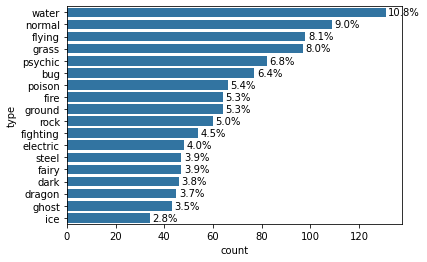

In [66]:
sb.countplot(data=pkmn_types, y='type', color=selected_color, order=selected_order);

# Logic to print the proportion text on the bars
for i in range(pokemon_types_count):
    
    # Convert props into a string
    pct_string = '{:0.1f}%'.format(props_pokemon[i])
    
    # Print the string value on the bar.
    plt.text(pokemon_types_frequency[i] + 1, i, pct_string, va='center')

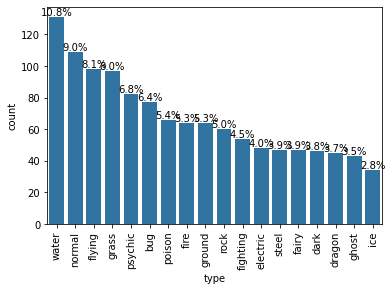

In [69]:
sb.countplot(data=pkmn_types, x='type', color=selected_color, order=selected_order);

plt.xticks(rotation=90) # Solve the overlapping issue for the x-labels (1)

# Logic to print the proportion text on the bars
for i in range(pokemon_types_count):
    
    # Convert props into a string
    pct_string = '{:0.1f}%'.format(props_pokemon[i])
    
    # Print the string value on the bar.
    plt.text(i, pokemon_types_frequency[i] + 1, pct_string, ha='center')

In [71]:
from matplotlib import rcParams #Solve the percentage overlapping (2)
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

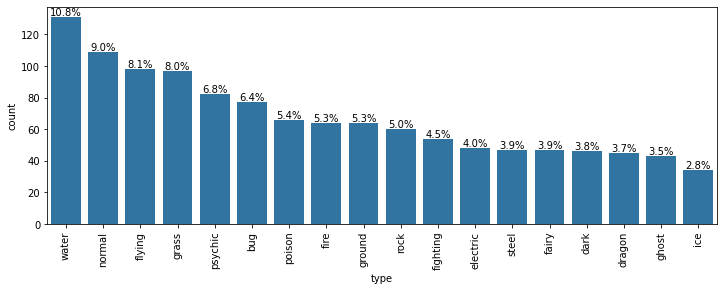

In [72]:
sb.countplot(data=pkmn_types, x='type', color=selected_color, order=selected_order);

plt.xticks(rotation=90) # Solve the overlapping issue for the x-labels (1)

# Logic to print the proportion text on the bars
for i in range(pokemon_types_count):
    
    # Convert props into a string
    pct_string = '{:0.1f}%'.format(props_pokemon[i])
    
    # Print the string value on the bar.
    plt.text(i, pokemon_types_frequency[i] + 1, pct_string, ha='center')